In [123]:
#!pip install --upgrade google-api-python-client
#!pip install oauth2client

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import apikey

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

In [124]:
dev_key = apikey.api_key
api_service_name = "youtube"
api_ver = "v3"

In [125]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

In [126]:
search_response = youtube.search().list(
    q = "공부하는섭이",
    order = "relevance",
    part = "snippet",
    maxResults = 50
    ).execute()

In [127]:
channel_id = search_response['items'][0]['id']['channelId']

In [128]:
playlists = youtube.playlists().list(
    channelId = channel_id,
    part = "snippet",
    maxResults = 20
    ).execute()

In [129]:
import pandas as pd

ids=[]
titles=[]
for i in playlists['items']:
    ids.append(i['id'])
    titles.append(i['snippet']['title'])
    
df=pd.DataFrame([ids,titles]).T
df.columns=['PlayLists','Titles']

df.head(5)

,PlayLists,Titles
0,PLfkfgvn_kFAU6nfQ-zL_JV8D_SWeHVuRV,Shorts
1,PLfkfgvn_kFAX8jvsuRcoFp6CFPAUehok8,일상 Vlog
2,PLfkfgvn_kFAV4YksRjqGU_H9dWmMRylSG,Q&A / 정보 제공


In [157]:
#Videos' list
dtcu=df['PlayLists'][0]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf=pd.DataFrame([date,video_names,video_ids]).T
vdf.columns=['Date','Title','IDS']
vdf['ListNo'] = 1
vdf.head(5)

,Date,Title,IDS,ListNo
0,2022-08-20T20:27:40Z,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,EQ4xjclxig0,1
1,2022-08-20T20:27:40Z,미국에서 보내는 첫 생일 #Shorts,AA2ls2fBwdU,1
2,2022-08-20T20:27:40Z,맛이 가버린 텍사스 날씨 #shorts,o12WipNjpwM,1
3,2022-08-20T20:27:40Z,새해를 맞이하는 게으른 유학생의 자세 #Shorts,RqM5xtkC5HM,1
4,2022-08-20T20:27:40Z,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,uTeI3PZPAD0,1


In [158]:
dtcu2=df['PlayLists'][1]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu2,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf2=pd.DataFrame([date,video_names,video_ids]).T
vdf2.columns=['Date','Title','IDS']
vdf2['ListNo'] = 2
vdf2.head(5)

,Date,Title,IDS,ListNo
0,2022-08-20T20:26:52Z,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,fLA0abcqyTE,2
1,2022-08-20T20:26:52Z,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,aBtYmx-AhlU,2
2,2022-08-20T20:26:52Z,여름방학 맞아 푹 삶아진(?) 미국 대학원생 Vlog - 응 몰라 일단 쉴거야,frxWAxQvPcw,2
3,2022-08-20T20:26:52Z,기말고사까지 우당탕탕 치른 미국 대학원생 Vlog - 이겨내는 것이 아니라 버티는 것이다,5TQPtOVdr9Y,2
4,2022-08-20T20:26:52Z,또 첫 학기 어찌저찌 보낸 미국 대학원생 Vlog - 달라지기 위한 나날들,am2TFveOX08,2


In [132]:
dtcu3=df['PlayLists'][2]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu3,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf3=pd.DataFrame([date,video_names,video_ids]).T
vdf3.columns=['Date','Title','IDS']
vdf3['ListNo'] = 3

In [163]:
# Appending all lists into one single dataframe and reset the index to aviod index duplication
tdf = vdf.append(vdf2)
tdf = tdf.append(vdf3)
tdf.reset_index(inplace=True, drop=True)
len(tdf)

33

In [164]:
# Dislike count value has been removed according to Youtube's policy of not exposing the count of dislike.

import re

category_id=[]
views=[]
likes=[]
comments=[]
mins=[]
seconds=[]
title=[]
date=[]

for u in range(len(tdf)):
    request=youtube.videos().list(
    part='snippet,contentDetails,statistics',
    id=tdf['IDS'][u])
    
    response=request.execute()
    
    if response['items']==[]:
        ids.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        comments.append('-')
        date.append('-')
        
    else :
        title.append(response['items'][0]['snippet']['title'])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        date.append(response['items'][0]['snippet']['publishedAt'])
        
dtcu_df=pd.DataFrame([title,category_id,views,likes,comments,date]).T
dtcu_df.columns=['title','category_id','views','likes','comments','date']
dtcu_df['IDS'] = tdf['IDS']
dtcu_df.head(5)

,title,category_id,views,likes,comments,date,IDS
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,676,16,14,2022-08-10T01:50:16Z,EQ4xjclxig0
1,미국에서 보내는 첫 생일 #Shorts,22,389,32,14,2022-06-08T13:20:18Z,AA2ls2fBwdU
2,맛이 가버린 텍사스 날씨 #shorts,27,330,14,2,2022-04-05T09:07:09Z,o12WipNjpwM
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08T07:46:42Z,RqM5xtkC5HM
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,318,15,3,2021-12-25T05:49:16Z,uTeI3PZPAD0


In [165]:
# Sorted lists merging - validation checked
dtcu_df['cat_clean'] = 0
for i in range(len(tdf)):
    if tdf['Title'][i] == dtcu_df['title'][i]:
        dtcu_df['cat_clean'][i] = tdf['ListNo'][i]
dtcu_df.head(5)

,title,category_id,views,likes,comments,date,IDS,cat_clean
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,676,16,14,2022-08-10T01:50:16Z,EQ4xjclxig0,1
1,미국에서 보내는 첫 생일 #Shorts,22,389,32,14,2022-06-08T13:20:18Z,AA2ls2fBwdU,1
2,맛이 가버린 텍사스 날씨 #shorts,27,330,14,2,2022-04-05T09:07:09Z,o12WipNjpwM,1
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08T07:46:42Z,RqM5xtkC5HM,1
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,318,15,3,2021-12-25T05:49:16Z,uTeI3PZPAD0,1


## Data Glancing

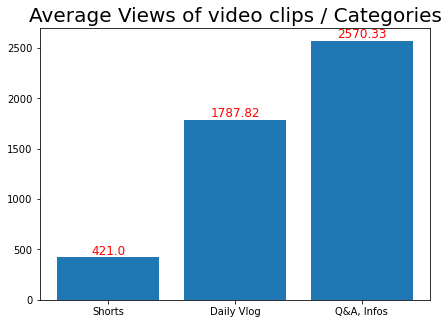

In [166]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

cal_1 = dtcu_df[dtcu_df['cat_clean'] == 1]
cal_2 = dtcu_df[dtcu_df['cat_clean'] == 2]
cal_3 = dtcu_df[dtcu_df['cat_clean'] == 3]

comp1 = pd.to_numeric(cal_1[['category_id', 'views']].views).mean()
comp2 = pd.to_numeric(cal_2[['category_id', 'views']].views).mean()
comp3 = pd.to_numeric(cal_3[['category_id', 'views']].views).mean()
compf = [round(comp1, 2), round(comp2, 2), round(comp3, 2)]
#compf

plt.figure(figsize=(7, 5))
x = np.arange(3)
cat_label = ['Shorts', 'Daily Vlog', 'Q&A, Infos']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('Average Views of video clips / Categories', fontsize=20)
plt.show()

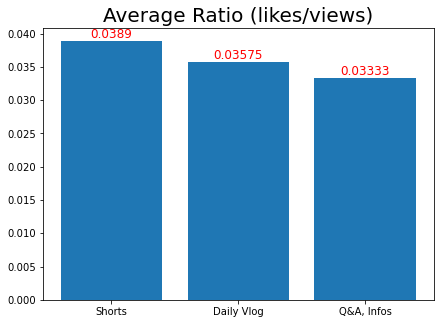

In [167]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

# Ratio of views/likes

comp1 = pd.to_numeric(cal_1[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_1[['category_id', 'views', 'likes']].views).mean()
comp2 = pd.to_numeric(cal_2[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_2[['category_id', 'views', 'likes']].views).mean()
comp3 = pd.to_numeric(cal_3[['category_id', 'views', 'likes']].likes).mean()/pd.to_numeric(cal_3[['category_id', 'views', 'likes']].views).mean()
compf = [round(comp1, 5), round(comp2, 5), round(comp3, 5)]

plt.figure(figsize=(7, 5))
x = np.arange(3)
cat_label = ['Shorts', 'Daily Vlog', 'Q&A, Infos']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average Ratio (likes/views)', fontsize=20)
plt.show()

In [168]:
from datetime import datetime, date

dtcu_df['weekday'] = 0
dtcu_dfw = dtcu_df
dateDict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

for i in range(len(dtcu_df)):
    dtcu_dfw['date'][i] = (dtcu_df['date'][i][:10])
    dtcu_dfw['date'][i] = datetime.strptime(dtcu_df['date'][i], '%Y-%m-%d')
    dtcu_dfw['weekday'][i] = dtcu_df['date'][i].weekday()
    dtcu_dfw['weekday'][i] = dateDict[dtcu_df['weekday'][i]]
    
dtcu_dfw.head(5)

,title,category_id,views,likes,comments,date,IDS,cat_clean,weekday
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,676,16,14,2022-08-10 00:00:00,EQ4xjclxig0,1,Wed
1,미국에서 보내는 첫 생일 #Shorts,22,389,32,14,2022-06-08 00:00:00,AA2ls2fBwdU,1,Wed
2,맛이 가버린 텍사스 날씨 #shorts,27,330,14,2,2022-04-05 00:00:00,o12WipNjpwM,1,Tue
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08 00:00:00,RqM5xtkC5HM,1,Sat
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,318,15,3,2021-12-25 00:00:00,uTeI3PZPAD0,1,Sat


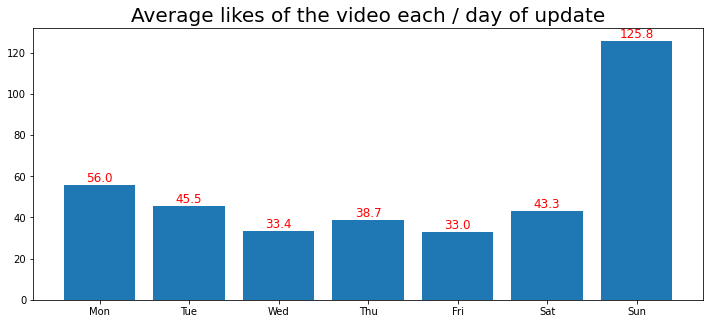

In [169]:
cal_1 = dtcu_dfw[dtcu_df['weekday'] == 'Mon']
cal_2 = dtcu_dfw[dtcu_df['weekday'] == 'Tue']
cal_3 = dtcu_dfw[dtcu_df['weekday'] == 'Wed']
cal_4 = dtcu_dfw[dtcu_df['weekday'] == 'Thu']
cal_5 = dtcu_dfw[dtcu_df['weekday'] == 'Fri']
cal_6 = dtcu_dfw[dtcu_df['weekday'] == 'Sat']
cal_7 = dtcu_dfw[dtcu_df['weekday'] == 'Sun']

comp1 = pd.to_numeric(cal_1[['views', 'likes', 'weekday']].likes).sum()/len(cal_1)
comp2 = pd.to_numeric(cal_2[['views', 'likes', 'weekday']].likes).sum()/len(cal_2) 
comp3 = pd.to_numeric(cal_3[['views', 'likes', 'weekday']].likes).sum()/len(cal_3)
comp4 = pd.to_numeric(cal_4[['views', 'likes', 'weekday']].likes).sum()/len(cal_4)
comp5 = pd.to_numeric(cal_5[['views', 'likes', 'weekday']].likes).sum()/len(cal_5)
comp6 = pd.to_numeric(cal_6[['views', 'likes', 'weekday']].likes).sum()/len(cal_6)
comp7 = pd.to_numeric(cal_7[['views', 'likes', 'weekday']].likes).sum()/len(cal_7)
compf = [round(comp1, 1), round(comp2, 1), round(comp3, 1), round(comp4, 1), round(comp5, 1), round(comp6, 1), round(comp7, 1)]
#compf

plt.figure(figsize=(12, 5))
x = np.arange(7)
cat_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average likes of the video each / day of update', fontsize=20)
plt.show()

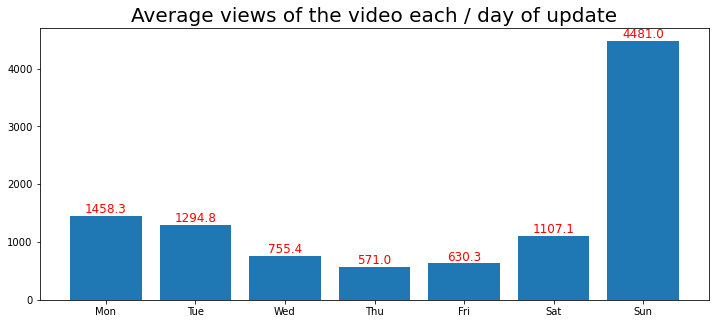

In [170]:
comp1 = pd.to_numeric(cal_1[['views', 'likes', 'weekday']].views).sum()/len(cal_1)
comp2 = pd.to_numeric(cal_2[['views', 'likes', 'weekday']].views).sum()/len(cal_2) 
comp3 = pd.to_numeric(cal_3[['views', 'likes', 'weekday']].views).sum()/len(cal_3)
comp4 = pd.to_numeric(cal_4[['views', 'likes', 'weekday']].views).sum()/len(cal_4)
comp5 = pd.to_numeric(cal_5[['views', 'likes', 'weekday']].views).sum()/len(cal_5)
comp6 = pd.to_numeric(cal_6[['views', 'likes', 'weekday']].views).sum()/len(cal_6)
comp7 = pd.to_numeric(cal_7[['views', 'likes', 'weekday']].views).sum()/len(cal_7)
compf = [round(comp1, 1), round(comp2, 1), round(comp3, 1), round(comp4, 1), round(comp5, 1), round(comp6, 1), round(comp7, 1)]
#compf

plt.figure(figsize=(12, 5))
x = np.arange(7)
cat_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')
    
plt.title('Average views of the video each / day of update', fontsize=20)
plt.show()

## Extraction Reply

In [17]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

reviews = []

for i in range(len(dtcu_df)):
    cm = youtube.commentThreads().list(
        videoId = dtcu_df['IDS'][i],
        order = 'relevance',
        part = 'snippet',
        maxResults = 100
    ).execute()
    for i in cm['items']:
        reviews.append(i['snippet']['topLevelComment']['snippet']['textOriginal'])

adf = pd.DataFrame(reviews, columns=['Comments'])
adf

,Comments
0,요즘은 정말 한식이 많아져서~사실 맛있는곳도 많아서 유학생활 할때 참 도움이 많이 ...
1,영상 항상 잘 보고있습니다 :) 이번 영상은 bgm이 너무 좋아서 찾아봤네요ㅎㅎ 덕...
2,화이팅입니다 항상 챙겨보면서 응원하고있어요
3,달라스 클라쓰 🤭
4,아니....................................... 전 왜 ...
...,...
414,혹시 같은 유학생분들중에 평범한 스펙가진 분들도 계신가요? 제가 그 경우라 유튜브에...
415,와 정말 적게 쓰시네요!! 대학원생활하면서 살림이 가능하신가용?? 저는 맨날 사먹거...
416,혹시 박사생이시면 텍사스 지역 스트라이펜드 얼마정도 받으세요??
417,스타벅스는 정말 국룰이군요..ㅋㅋㅋㅋㅋ 커피만은 포기못해.....


In [18]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  419 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


## Pre-processing

In [42]:
#!pip install konlpy
#!pip install collections
#!pip install wordcloud
from konlpy.tag import Hannanum
from collections import Counter
from wordcloud import WordCloud
import re

In [43]:
font_path_input = 'C:/Windows/Fonts/malgun.ttf'

In [44]:
texts = ''
for i in list(adf['Comments']):
    texts += i
#texts

In [64]:
# Cleansing Emoji
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Cleansing phrases that compromise the analysis
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

comment_result = []
str_result = ''
for i in texts:
    tokens = re.sub(emoji_pattern, "", i)
    tokens = re.sub(han, "", tokens)
    str_result += tokens
    comment_result.append(tokens)
#str_result

## WordCloud Generating

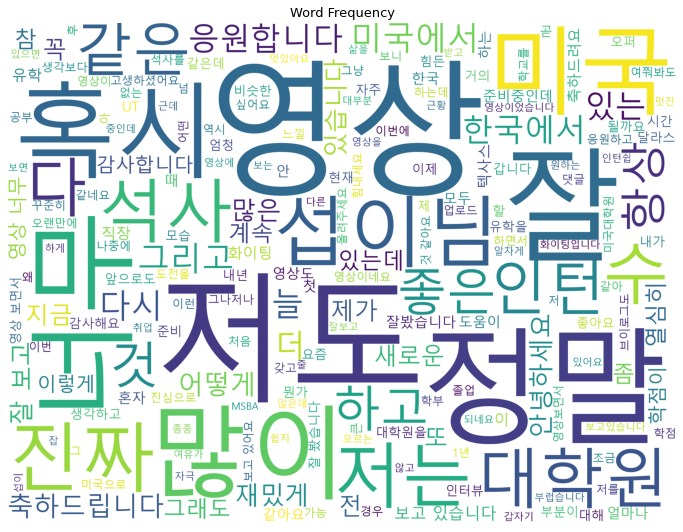

In [65]:
wordcloud = WordCloud(font_path=font_path_input, background_color='white', width=3200, height=2400)
cloud = wordcloud.generate(str_result)
plt.figure(figsize = (12, 12)) # 최종 워드 클라우드 사이즈 지정
plt.imshow(cloud)
plt.title("Word Frequency", size = 13)
plt.axis('off')
plt.show()